# Life Expectancy & GDP — Exploratory Analysis
**Dataset:** `all_data.csv` from the Life Expectancy and GDP starter pack (2000–2015)

**What this notebook does**
- Loads & cleans the data
- Builds plots: line charts, histogram, boxplot, **violin**, **facet grids**, and **log10(GDP) vs life expectancy** with regression
- Computes average life expectancy by country and correlations (overall & by country)

> Tip: Set `DATA_PATH` below to your CSV location (e.g., `./data/all_data.csv`). All figures are also saved into `./figures/` and tables into `./outputs/`.

In [1]:
from __future__ import annotations
from pathlib import Path
import json

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Where to read data from and where to save outputs
DATA_PATH = 'all_data.csv'  # Path to the input data file
OUTDIR = Path('.')                  # Root for ./figures and ./outputs

# Styling
sns.set_theme(style="whitegrid")

def ensure_dirs(root: Path):
    (root / "figures").mkdir(parents=True, exist_ok=True)
    (root / "outputs").mkdir(parents=True, exist_ok=True)

ensure_dirs(OUTDIR)
print('Saving figures to', OUTDIR / 'figures')
print('Saving outputs to', OUTDIR / 'outputs')


Saving figures to figures
Saving outputs to outputs


In [2]:
# Load dataset
csv_path = Path(DATA_PATH)
if not csv_path.exists():
    raise FileNotFoundError(f"CSV not found: {csv_path.resolve()}\n"
                            "Place all_data.csv under ./data or update DATA_PATH.")

df = pd.read_csv(csv_path)
df = df.rename(columns={
    'Life expectancy at birth (years)': 'life_expectancy',
    'GDP': 'gdp'
})

# Helpers
df['gdp_billion'] = df['gdp'] / 1e9
df['log_gdp'] = np.log10(df['gdp'])

display(df.head())
print('Countries:', df['Country'].unique())
print('Year range:', df['Year'].min(), 'to', df['Year'].max())

,Country,Year,life_expectancy,gdp,gdp_billion,log_gdp
0,Chile,2000,77.3,7.786093e+10,77.860932,10.891320
1,Chile,2001,77.3,7.097992e+10,70.979924,10.851136
2,Chile,2002,77.8,6.973681e+10,69.736811,10.843462
3,Chile,2003,77.9,7.564346e+10,75.643460,10.878771
4,Chile,2004,78.0,9.921039e+10,99.210393,10.996557


Countries: ['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
Year range: 2000 to 2015


In [3]:
def figpath(name: str) -> Path:
    return OUTDIR / 'figures' / f'{name}.png'

def outpath(name: str, ext: str) -> Path:
    return OUTDIR / 'outputs' / f'{name}.{ext}'


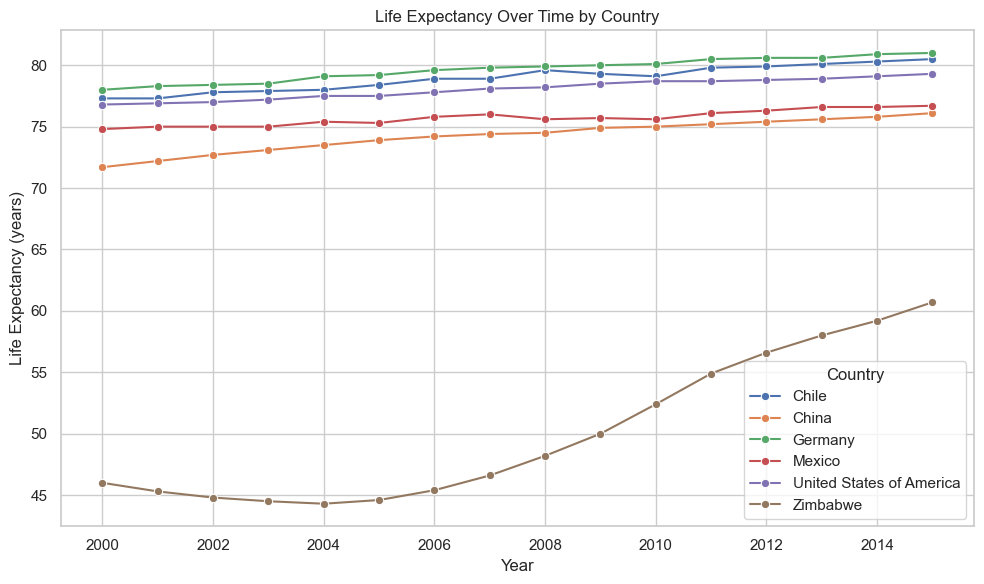

In [4]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Year', y='life_expectancy', hue='Country', marker='o')
plt.title('Life Expectancy Over Time by Country')
plt.ylabel('Life Expectancy (years)')
plt.xlabel('Year')
plt.tight_layout()
plt.savefig(figpath('life_expectancy_over_time'))
plt.show()

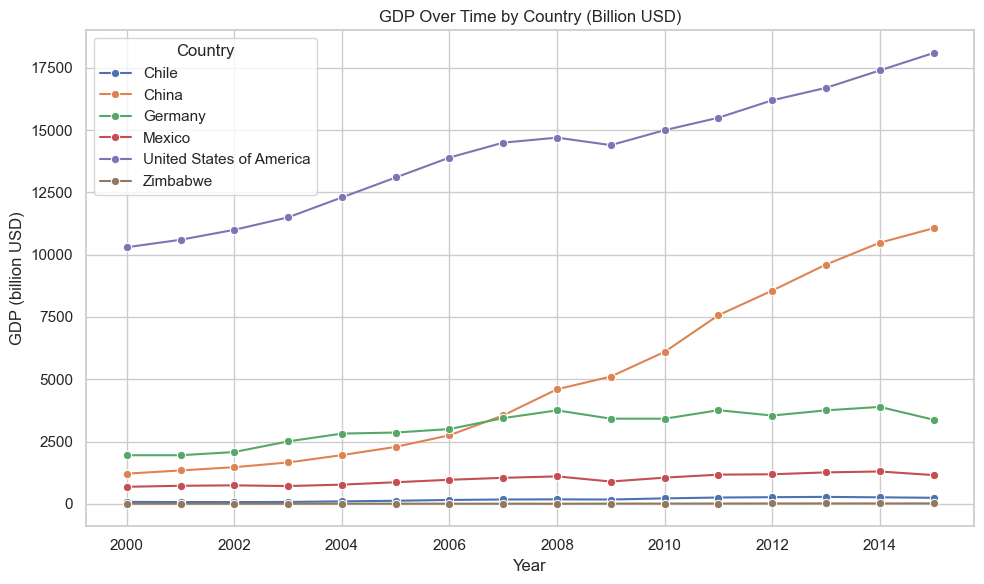

In [5]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Year', y='gdp_billion', hue='Country', marker='o')
plt.title('GDP Over Time by Country (Billion USD)')
plt.ylabel('GDP (billion USD)')
plt.xlabel('Year')
plt.tight_layout()
plt.savefig(figpath('gdp_over_time'))
plt.show()

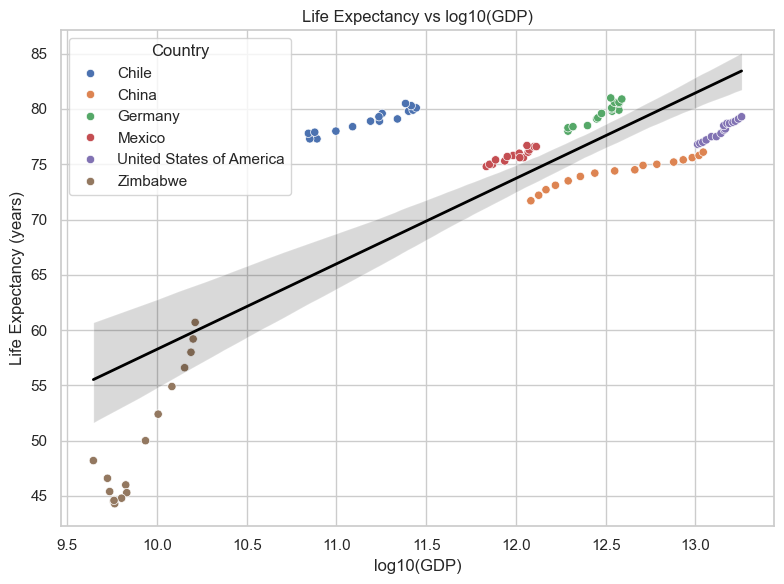

In [6]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='log_gdp', y='life_expectancy', hue='Country')
sns.regplot(data=df, x='log_gdp', y='life_expectancy',
            scatter=False, color='black', line_kws={'lw': 2})
plt.title('Life Expectancy vs log10(GDP)')
plt.xlabel('log10(GDP)')
plt.ylabel('Life Expectancy (years)')
plt.tight_layout()
plt.savefig(figpath('life_expectancy_vs_log_gdp'))
plt.show()

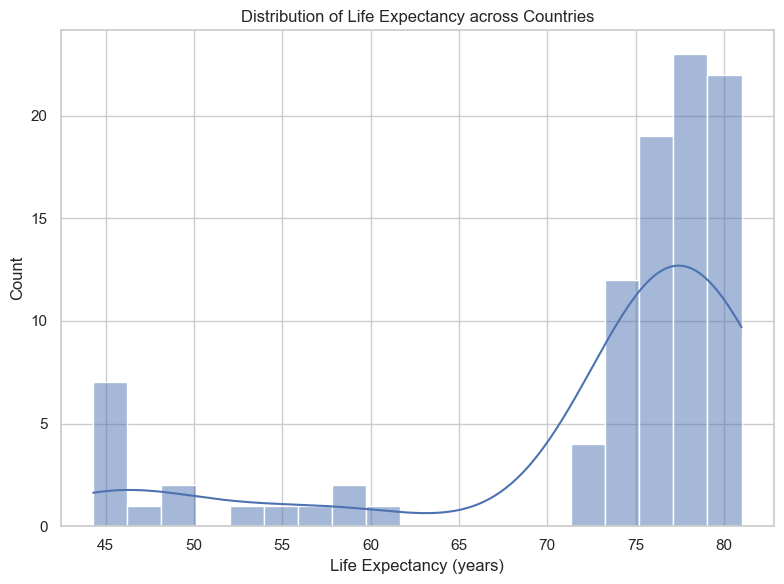

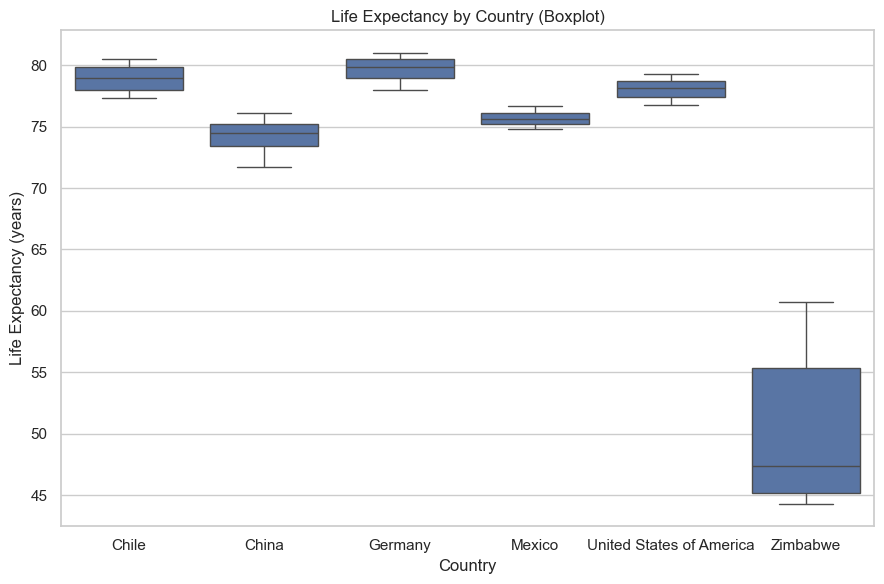

In [7]:
plt.figure(figsize=(8, 6))
sns.histplot(df['life_expectancy'], kde=True)
plt.title('Distribution of Life Expectancy across Countries')
plt.xlabel('Life Expectancy (years)')
plt.tight_layout()
plt.savefig(figpath('life_expectancy_distribution'))
plt.show()

plt.figure(figsize=(9, 6))
sns.boxplot(x='Country', y='life_expectancy', data=df)
plt.title('Life Expectancy by Country (Boxplot)')
plt.xlabel('Country')
plt.ylabel('Life Expectancy (years)')
plt.tight_layout()
plt.savefig(figpath('life_expectancy_boxplot'))
plt.show()

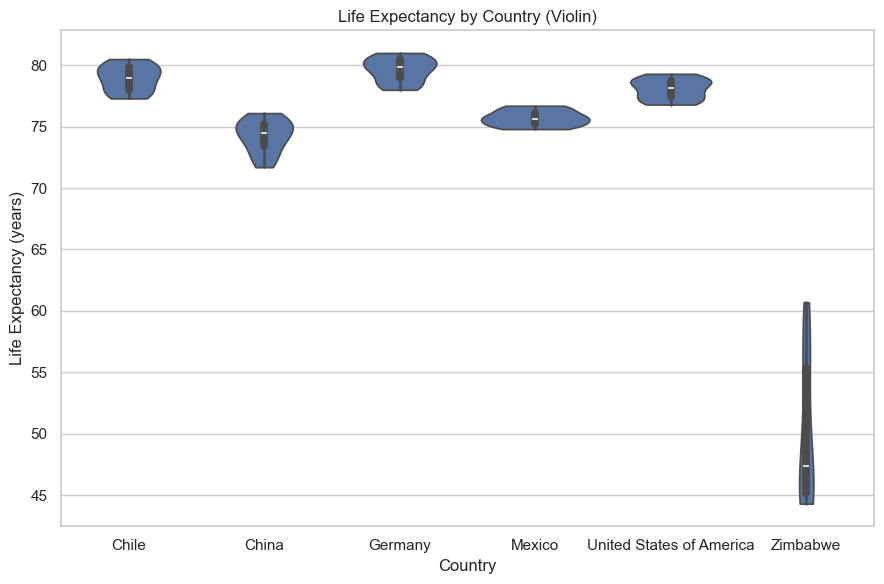

In [8]:
plt.figure(figsize=(9, 6))
sns.violinplot(x='Country', y='life_expectancy', data=df, inner='box', cut=0)
plt.title('Life Expectancy by Country (Violin)')
plt.xlabel('Country')
plt.ylabel('Life Expectancy (years)')
plt.tight_layout()
plt.savefig(figpath('life_expectancy_violin'))
plt.show()

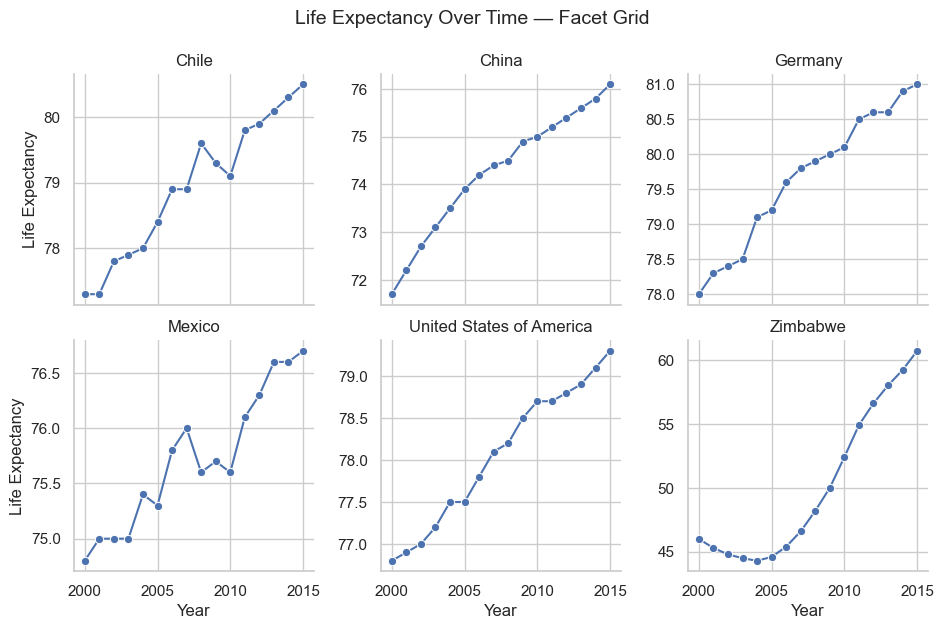

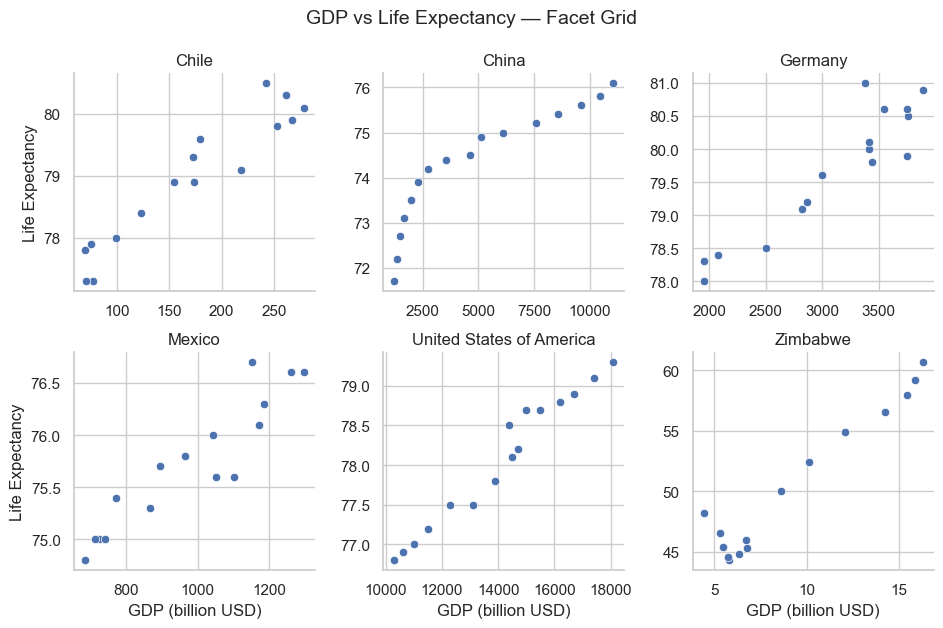

In [9]:
# Life expectancy over time — facet grid
g = sns.FacetGrid(df, col='Country', col_wrap=3, height=3.2, sharey=False)
g.map_dataframe(sns.lineplot, x='Year', y='life_expectancy', marker='o')
g.set_titles('{col_name}')
g.set_axis_labels('Year', 'Life Expectancy')
g.fig.suptitle('Life Expectancy Over Time — Facet Grid', fontsize=14)
plt.subplots_adjust(top=0.88)
g.savefig(figpath('facet_grid_life_expectancy'))
plt.show()

# GDP vs Life expectancy — facet grid
g2 = sns.FacetGrid(df, col='Country', col_wrap=3, height=3.2, sharex=False, sharey=False)
g2.map_dataframe(sns.scatterplot, x='gdp_billion', y='life_expectancy')
g2.set_axis_labels('GDP (billion USD)', 'Life Expectancy')
g2.set_titles('{col_name}')
g2.fig.suptitle('GDP vs Life Expectancy — Facet Grid', fontsize=14)
plt.subplots_adjust(top=0.88)
g2.savefig(figpath('facet_grid_scatter'))
plt.show()

In [10]:
# Average life expectancy by country
avg_life = (
    df.groupby('Country')['life_expectancy']
    .mean()
    .round(2)
    .rename('avg_life_expectancy')
    .reset_index()
)
display(avg_life)
avg_life.to_csv(outpath('average_life_expectancy_by_country', 'csv'), index=False)

# Correlations
overall_corr = float(df['life_expectancy'].corr(df['log_gdp']))
by_country = {
    c: float(g['life_expectancy'].corr(g['log_gdp']))
    for c, g in df.groupby('Country')
}

print(f"Overall Pearson correlation (life_expectancy vs log10(GDP)): {overall_corr:.3f}")
for c, v in by_country.items():
    print(f"  {c}: {v:.3f}")

with open(outpath('correlations', 'json'), 'w') as f:
    json.dump({'overall': overall_corr, 'by_country': by_country}, f, indent=2)


,Country,avg_life_expectancy
0,Chile,78.94
1,China,74.26
2,Germany,79.66
3,Mexico,75.72
4,United States of America,78.06
5,Zimbabwe,50.09


Overall Pearson correlation (life_expectancy vs log10(GDP)): 0.787
  Chile: 0.955
  China: 0.973
  Germany: 0.927
  Mexico: 0.929
  United States of America: 0.981
  Zimbabwe: 0.941
